# Introduction to our Submission System

In this exercise you will:

- Learn how to work with ipython notebooks
- See the interaction with external python code
- Do random stuff

Run cells with __Shift + Enter__

## Ipython Notebooks
An IPython notebook is made up of a number of cells. Each cell can contain Python code. You can execute a cell by clicking on it and pressing [Shift-Enter]. When you do so, the code in the cell will run, and the output of the cell will be displayed beneath the cell. For example, after running the first cell the notebook looks like this:

In [1]:
x = 5
print(x+3)

8


Global variables are shared between cells. Therefore, we can access __x__ in the next cell.

In [2]:
print(x+10)

15


By convention, IPython notebooks are expected to be run from top to bottom. Failing to execute some cells or executing cells out of order can result in errors:

In [3]:
print(x+y)

NameError: name 'y' is not defined

In [4]:
y = 3

After you have modified an IPython notebook for one of the assignments by modifying or executing some of its cells, remember to __save your changes__!

We start every notebook with a cell containg the important imports.


In [5]:
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Data Loading#
To your convenience, we prepared all datasets and wrote functions to download the required data for every exercise. In order to get download the datasets execute the __download_dataset.sh__ script in the respective exercise folder. After doing so, check the __datasets__ folder if you have successfully downloaded the CIFAR-10 dataset.
The next cell will load the CIFAR-10 data into our notebook.

In [6]:
from exercise_code.data_utils import load_CIFAR10
# Load the raw CIFAR-10 data
cifar10_dir = 'datasets/'
X, y = load_CIFAR10(cifar10_dir)
print(X.shape, y.shape)

(50000, 32, 32, 3) (50000,)


<div class="alert alert-info">
    <h3>Inline Question</h3>
    <p>Sometimes we ask inline questions. We will answer them in the tutorial sessions after the exercise is over.</p>
    <p>**Your answer:** </p>
</div>

## External Files
Most of your work will involve implementing certain functions in external python files. These are contained in the __exercise_code__ folder. Check out the __TestClass__ in __exercise_code/test_class.py__ and write yourself a message.

In [10]:
from exercise_code.test_class import TestClass

test_class = TestClass()
test_class.write()

I've been replaced ;)


## Model Files and Saving

Usually, we ask you to train and submit models. Edit the in __return_score__ function of the __TestSubmission__ class in __exercise_code/test_class.py__. If you return more than __50__, you pass.

In [11]:
from exercise_code.test_class import TestModel
from exercise_code.data_utils import evaluate

# model rename
# inline in exercise session
model = TestModel()
evaluate(model.return_score())

Horray, you passed! Now save your model and submit it!


Now you need to save the model. We provide you with all the functionality, so you will only need to execute the next cell.

In [12]:
from exercise_code.model_savers import save_test_model
save_test_model(model)

<div class="alert alert-danger">
    <h3>Warning</h3>
    <p>You might get an error like this:</p>
    <p>PicklingError: Can't pickle `<class 'exercise_code.test_model.TestModel'>`: it's not the same object as exercise_code.test_class.TestSubmission</p>
    <p>The reason is that we are using autoreload and working on this class during the notebook session. If you get this error simply restart the kernel and rerun the whole script (Kernel -> Restart & Run All) or only the important cells for generating your model.</p>
</div>

## Submission

Now, that you have completed the neccessary parts in the notebook, you can go on and submit your files. 
1. Go on [our submission page](https://dvl.in.tum.de/teaching/submission/), register for an account and login. You will get an id which we need in the next step.
2. Run the exercise submission script in the main folder like this
`submit_exercise.sh <exercise number, here 0> <your id, e.g. s1234>`
3. Log into [our submission page](https://dvl.in.tum.de/teaching/submission/) with your account details where you should be able to see all the submitted "test_model.p" file.
4. Click on this file and run the submission script. You will get an email with the score you've set earlier in the "return_score" function.

<img src="i2dlsubmission.png">

## Congratz, you finished this introductory notebook!



# Optional: Data Preperation

Now, you are done with the "mandatory" part of this notebook. In the following notebooks, we will supply you with all neccessary tools so you can concentrate on writing the model specific parts as this is the main focus of this class. However, you should also be proficient with handling data and how to prepare it for your specific task.

For this, you should consider performing the following steps using numpy comprehensions:
1. Before start a classification task you should *always* take a look at some samples of your dataset. This way you can make sure that the data input has worked as intended and you can get a feeling for the dataset. Visualize a subset of the images (X) in the CIFAR-10 dataset in this notebook or a seperate file and identify all ten classes (y). (Hint: Use matplotlib)
2. Split the training data into there sets: a "training", "validation" and "test" consisting of 48000, 1000 and 1000 elements.
3. In order to run quick experiments, extract a small random subset of the training set which we call "development" set.
4. Data preprocessing: compute the mean image and substract this image from the images of our datasets. Why is this step helpful for machine learning methods? Research other preprocessing methods that might be useful.

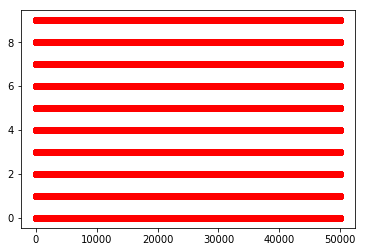

In [22]:
plt.plot(np.arange(50000), y, 'ro')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.04, random_state = 0)
X_test, X_val = train_test_split(X_test, test_size=0.5, random_state = 0)
#X_train = X[:48000,:,:,:]
#X_test = np.zeros((1, 2, 3))
#X_val = np.zeros((1, 2, 3))
X_dev, X_0 = train_test_split(X, test_size=0.9)

In [28]:
print(X_train.shape, X_test.shape, X_val.shape, X_dev.shape)

(48000, 32, 32, 3) (1000, 32, 32, 3) (1000, 32, 32, 3) (5000, 32, 32, 3)


In [30]:
M = np.mean(X,axis = 0)
M.shape
X_diff = X - M